CART = Classification & Regression Tree
→ Hem sınıflandırma (classification) hem de regresyon (regression) problemlerinde kullanılabilir.

Sınıflandırmanın temeli budur.
→ Özellikle karar ağacı modellerinde temel algoritmalardan biridir.

CART, veri setini bir karar ağacına dönüştürür ve veriyi dallara ayırarak tahmin yapar.
→ Her düğümde veri iki gruba ayrılır.

Decision Tree’nin "Evet-Hayır" dallarıyla çalıştığı gibi sağa ya da sola yönlendirerek veriyi böler.
→ Her karar düğümünde bir koşul (örneğin: "Yaş < 30?") sorulur ve cevaba göre dallanma gerçekleşir.

Koordinat düzleminde düşündüğümüzde, karar ağacı çok daha açıklayıcıdır.
→ Özellikle 2 boyutlu verilerde, karar sınırları grafikte net şekilde görülebilir.
→ Her bölünme veriyi belirli bir düz çizgiyle ayırır (örneğin, x=30 veya y=50 gibi).

Elimizdeki veri seti kümeler halinde ayrılır ve hedef (target) verildiğinde, model bu kümeleri bölerek hangi noktada hangi sınıfa ait olduğunu veya hangi değerin tahmin edilmesi gerektiğini bulur.
→ Örneğin: Bir noktanın "sigara içiyor" ya da "içmiyor" sınıfına ait olup olmadığını belirlemek için veri kümesi dallara ayrılır.
https://www.youtube.com/watch?v=TFK01BMo1Ew

![alt text](pngs/7.png)

bu formül regresyon için 

yi=gerçek değerler

karar ağacında bölünme noktaları gerçek değerle tahmin edilen değerlerin kare farkının min olduğu nokta hedefleniyor ki hata az olsun
ama burada tahmin edilen değer ortalama değerdir
örnek: veriseti = [10,12,14,20,25,30]

Veriyi ikiye bölelim:
    Grup 1: [10,12,14][10,12,14]
    Grup 2: [20,25,30][20,25,30]

Her Grup İçin Ortalama Alıyoruz:
    Grup 1 ortalaması: (10+12+14)/3=12(10+12+14)/3=12
    Grup 2 ortalaması: (20+25+30)/3=25(20+25+30)/3=25

Bu Ortalamalar Tahmin Değeri Oluyor:
    Grup 1'deki her veri noktası için tahmin = 12
    Grup 2'deki her veri noktası için tahmin = 25

ve formülü uyguluyoruz 
    Grup 1: (10−12)2+(12−12)^2+(14−12)^2=4+0+4=8(10−12)^2+(12−12)^2+(14−12)^2=4+0+4=8
    Grup 2: (20−25)^2+(25−25)^2+(30−25)^2=25+0+25=50(20−25)^2+(25−25)^2+(30−25)^2=25+0+25=50
Toplam RSS = 8 + 50 = 58

bu yapılan işlem ağacın ilk bölünme işlemiydi yani seçtiğimiz bölünme noktası kök değer
daha sonra bu işlemler bitene kadar tekrar eder ve apaç yapısı oluşur

burada önemli olan bölme noktasının belirlenmesi çünkü veriyi nereden böleceğin aldığın hata değerini değiştiriyor

# --------------------------------------------------------
### geldik işin sınıflandırma kısmına

![alt text](pngs/8.png)

her sınıf için gini indeksi ve entropiyi kullanarak en iyi bölme noktaları belirlenir (üstteki gini alttaki entropi)
the weighted loss ta her veriye bir ağırlık verip hataları ölçüyor

p ler her sınıfın veri kümesindeki olasılığıdır 

gini için --> örnek veride tek sınıf varsa = [A, A, A, A] --> pA = 4/4, pB = 0/4 = 1 - pA
 Gini=1−(pA^2​+pB^2​) = 1−(1^2+0^2)=1−1=0  0 çıktı yani saf sınıf demektir
[A, A, B, B] bu şekilde eşit dağılım varsa Gini=1−(pA^2​+pB^2​) = 1−(0.5^2+0.5^2) = 1−(0.25+0.25)=1−0.5=0.5  0.5 yani karışık küme

[A, A, A, B, B] 
pA = 3/5=0.6
pB = 2/5= 0.4
Gini=1−(0.62+0.42)=1−(0.36+0.16)=1−0.52=0.48
değer ne kadar düşükse okadar iyidir saftır çünkü gini indeksinin min olduğu yer en iyi bölünme noktasıdır

uzatmaya gerek yok entropi ve weighted loss da yapılır

In [18]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning) # bazı uyarıları görmezden geliyoruz

ModuleNotFoundError: No module named 'graphviz'

In [3]:
################################################
# 3. Modeling using CART
################################################

df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

# Confusion matrix için y_pred:
y_pred = cart_model.predict(X)

# AUC için y_prob:
y_prob = cart_model.predict_proba(X)[:, 1]

# Confusion matrix
print(classification_report(y, y_pred)) # çıktı full doğrusun diyor

roc_auc_score(y, y_prob) # çıktı %100

# burada sorulması gereken soru acaba bir sorunmu var overfittinge mi düştük bunu anlamak lazım


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



np.float64(1.0)

In [4]:
#####################
# Holdout Yöntemi ile Başarı Değerlendirme
#####################

# önce bir holdoutla bakalım sonra cross validation a bakarız

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)


# Train seti ile gözlemleyelim
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

# çıktı yine kusursuzsun diyor birde test setine bakalım

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



np.float64(1.0)

In [5]:
# Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

# sonuçları aşırı düştü demekki overfittinge yakalanmışız model eğitildiği train sette kusursuzum dedi ezberledi
# ama görmediği veriler üzerinden tahmin yaparken gerçeği yakaladık

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231



np.float64(0.6558441558441559)

In [6]:
#####################
# CV ile Başarı Değerlendirme
#####################

cart_model = DecisionTreeClassifier(random_state=17).fit(X, y) # aslında fit işlemini yapmasakta olur çünkü cross_validate zaten kendi yapıyor

cv_results = cross_validate(cart_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
# 0.7058568882098294
cv_results['test_f1'].mean()
# 0.5710621194523633
cv_results['test_roc_auc'].mean()
# 0.6719440950384347

np.float64(0.6719440950384347)

In [7]:
################################################
# 4. Hyperparameter Optimization with GridSearchCV
################################################

cart_model.get_params() # cart için parametrelere bakalım
# min_samples_split': 2 bunu ayarlamak gerek overfittinge bu sebep olmuş olabilir bunun amacı şudur minimum 2 değer varsa ağaç bölünebilir
# mesela a,b,c,d,e,f,g içinden grup1 =  a,b,c ve grup2 = d,e,f,g gibi iki yeni dal oluşturup ağacın bölünmesine izin verilir
# ama eğer min_sample_split değerini 4 olarak atasaydık grup1 min değeri sağlamadığından bölünme yapılmazdı

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [8]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}
# en iyi değeri hangisi tek tek deneyelim

cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

cart_best_grid.best_params_ # en iyi değer max_Depth için 5 min sample split için 4 imiş

cart_best_grid.best_score_ # en iyi skor 0.75 imiş

# bunlar tabi gridsearchcv nin default parametresi olan accuracy değeri için geçerli
# eğer scoring="f1" veya scoring="roc_auc" gibi metrikleri verirsen onlara göre en yüksek skoru veren değerleri alırdık

Fitting 5 folds for each of 180 candidates, totalling 900 fits


np.float64(0.7500806383159324)

In [9]:
################################################
# 5. Final Model
################################################

cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)
# cart_best_grid.best_params_ içindeki en iyi hiperparametreleri alarak modele aktarıyor.

cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)
# set_params metodu kullanılarak cart_best_grid.best_params_ içindeki en iyi parametreler mevcut modele uygulanıyor
# ikiside aynı şey ama benzer modeli güncellemek istiyorsan set_params kullan yada 0 dan model oluştururken üsttekini kullan

# neyse bakalım bu hiperparametreli optimizasyonlar işe yaradımı

cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean() #0.75

cv_results['test_f1'].mean() # 0.61

cv_results['test_roc_auc'].mean() # 0.79

# eskilerle karşılaştırınca bayağı işe yaramış

np.float64(0.797796645702306)

In [10]:
################################################
# 6. Feature Importance
################################################

# hangi özelliklerin target ı tahmin etmede ne kadar etkili olduğunu gösteren metriktir 
# özellikle decisiontree ve ensemble yöntemlerde kullanılır
# normalde normalizasyon standardizasyon ağaç yöntemlerinde gereksizdir demiştik ama feature importance veriyi yorumlaması için
# 0-1 aralığında normalize ediyor fakat bu sadece feature importance yorumlama yapması içindir zaten ek işlem yapılmaz otomatik gerçekleşir

# ne yapıyor
# bağımsız değişkenlerin bağımlı değişkene etkisini skorluyor ve skor ne kadar yüksekse 
# hedefi etkileyen değişken odur yorumu çıkarılır
# örnek veride yaş, gelir, kredi_skoru --> etki değeri yaş=0.15, gelir=0.60, kredi_skoru=0.25 olsun
# demekki tahmin sonucunu en çok etkileyen gelir değişkeni en az etkileyende yaş değişkeniymiş

cart_final.feature_importances_ # bizim final modeldeki değişkenlerden en önemlisi 0.49448119 buymuş bu kim bakalım

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

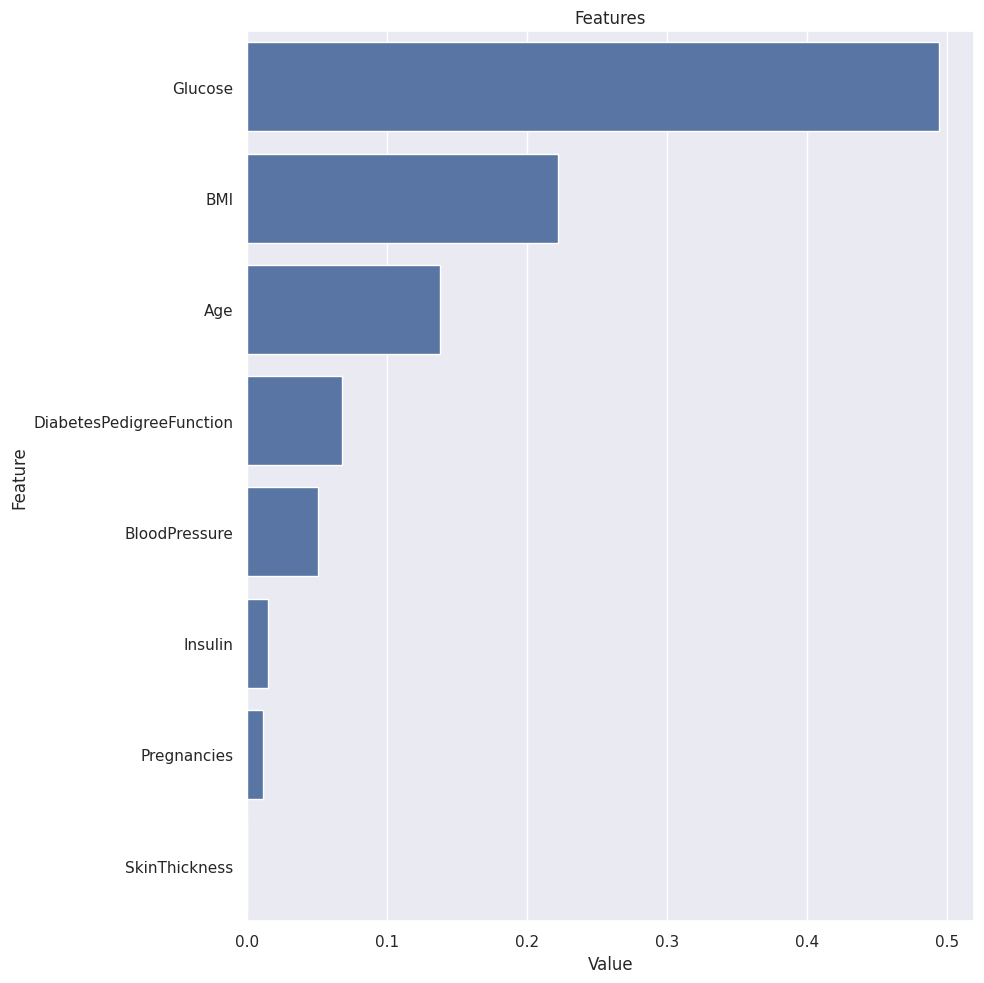

In [14]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(cart_final, X, num=8) # bu reis glucose imiş
# mesela skinthicknes değişkenini modelimiz hiç kullanmamış çıkarılır
# veya pregnancies çıkartılabilir buna karar verirken cross validation ile before-after yaparsın anlamlı bir kayıp yoksa at gitsin

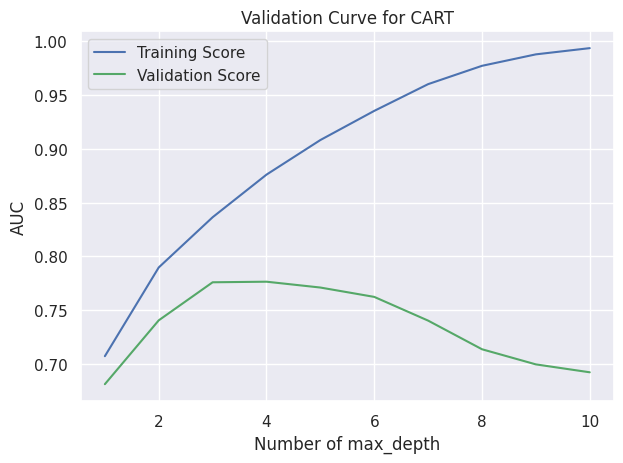

In [15]:
# ml temel kavramlarda en son grafikte model karmaşıklığı arttıkça train setinin hatasının düştüğünü
# test setinin hatasının arttığını gördük bu yüzden en optimum noktayı bulmak gerekir
# overfittinge düştükmü diye bakarken karmaşıklığı optimum noktada bırakmak gerekir

################################################
# 7. Analyzing Model Complexity with Learning Curves (BONUS)
################################################


train_score, test_score = validation_curve(cart_final, X, y, # model, bağımsız, bağımlı
                                           param_name="max_depth", # hangi parametre
                                           param_range=range(1, 11), # nereye kadar bakalım
                                           scoring="roc_auc", # hangi metrikte bakalım
                                           cv=10) # kaç katlı cross validation olsun

# ortalamaları buradan gözükür
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

# grafikten daha rahat görünür fakat dikkat burada bakktığımız şey sadece max_depth in en optimum grafiği
# zaten hiperparametre optimizasyonlarında en optimum noktayı bütün parametreler için görmüştük yani bu sadece analiz amaçlı
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g') # validation test ile aynı şey

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

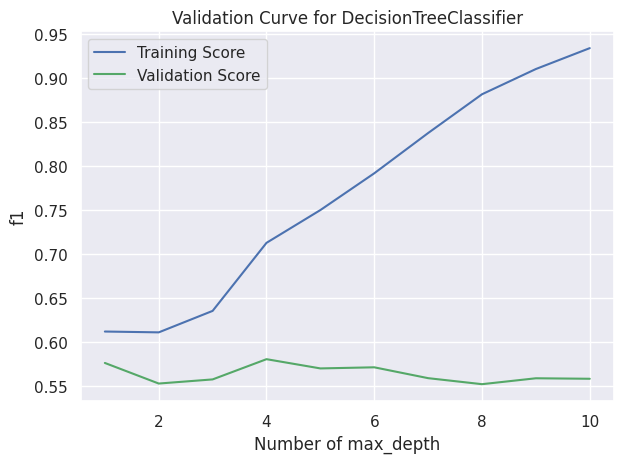

In [16]:
# programatik hali böylece bütün parametreler için tek tek yazmaya gerek yok
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

In [ ]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)


tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

# ağaç grafiği için graphviz kütüphanesi

In [19]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules) # ağacın neye göre bölüneceği kararlarını gösteren çıktı

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

In [ ]:
# bunlar sql ile çalışınca kodları bir yere göndermek için kullanılan şeyler
# skompile ile makine öğrenimi modelinizi SQL sorgusuna dönüştürüp, doğrudan veritabanında çalıştırabilirsiniz.
# sklearn '0.23.1' versiyonu ile yapılabilir.
# pip install scikit-learn==0.23.1

print(skompile(cart_final.predict).to('python/code'))

print(skompile(cart_final.predict).to('sqlalchemy/sqlite'))

print(skompile(cart_final.predict).to('excel'))

# skompile modülü, bir makine öğrenimi modelini farklı dillere veya formatlara çevirebilmek için kullanılır.
# Bu sayede sklearn modellerini SQL, Python, Excel veya başka formatlara dönüştürmek mümkün olur.
# Fakat bu modül, sklearn'ün belirli sürümleriyle uyumlu olmalıdır.

In [ ]:
################################################
# 11. Prediction using Python Codes
################################################

def predict_with_rules(x): # mesela modeldeki kararların çıktısını bu fonksiyona yapıştırırsak
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)

X.columns # her türlü veriyi yolladığımızda istersek sql avantajlarıyla hızlı bir şekilde tahmin sonuçlarını görebileceğiz
# mesela hastalık tahmini için tüm modeli kurarız buradan kullanıcı verisini alıp fonksiyona yollarız
x = [12, 13, 20, 23, 4, 55, 12, 7]

predict_with_rules(x)

x = [6, 148, 70, 35, 0, 30, 0.62, 50]

predict_with_rules(x)

In [ ]:
# şimdi gelelim daha gelişmiş haline modeli kaydedip gelen sorguya göre modeli çalıştırıcaz
# üst hücredekinden farkı joblib ile modeli diske kaydedip yine buradan heryerde kullanabiliriz

################################################
# 12. Saving and Loading Model
################################################

joblib.dump(cart_final, "cart_final.pkl") # finalde oluşturduğumuz modeli .pkl formatında kaydediyoruz
# .pkl pythondaki pickle formatıdır

cart_model_from_disc = joblib.load("cart_final.pkl") # burada modeli gerekli yerlere yüklüyoruz

x = [12, 13, 20, 23, 4, 55, 12, 7] # x burada örnek bir veriseti

cart_model_from_disc.predict(pd.DataFrame(x).T)

# her seferinde modeli tekrar tekrar eğitmeye gerek yok bu sayede eğitilmiş olan modeli kullanırızki llm servarlarından
# eğitilmiş model çıktısını kısa sürede almamızın sebebi budur
